---
# **Plane Price Prediction**

---
#### **objective of this analysis:**
1. **understanding key factors that unfluences a plane price**
2. **analysing price sensibilty to the plane features**
3. **building a ML model for predicting the price of a plane**
---

#### **Project workflow:**
1. **importing libraries**
1. **data cleaning and preprocessing**
2. **EDA and hypothesis making**
3. **data preparation for ML model ( scaling , standardisation,encoding )**
4. **model building(training,testing)**
5. **model evaluation and hyperparams tuning**
---

1. **importing libraries**

In [100]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

2. **data cleaning and preprocessing**

In [101]:
df = pd.read_csv("Plane Price.csv")
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


<Axes: >

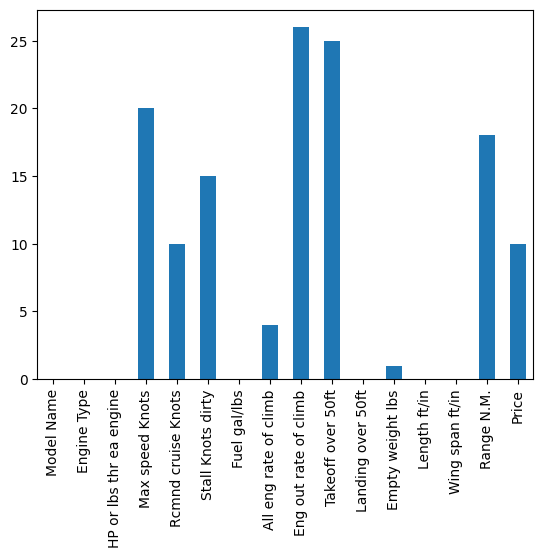

In [102]:
df.isnull().sum().plot(kind='bar')

<Axes: >

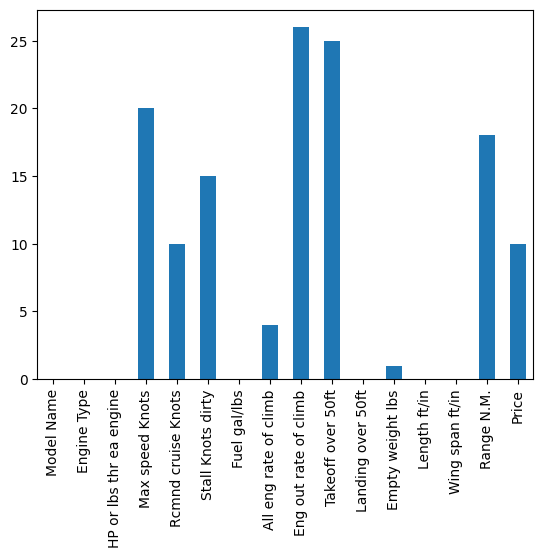

In [103]:
df.isna().sum().plot(kind='bar')

In [104]:
df.dropna(axis=0,inplace=True)

In [105]:
df.dtypes

Model Name                  object
Engine Type                 object
HP or lbs thr ea engine     object
Max speed Knots             object
Rcmnd cruise Knots         float64
Stall Knots dirty          float64
Fuel gal/lbs                 int64
All eng rate of climb       object
Eng out rate of climb      float64
Takeoff over 50ft          float64
Landing over 50ft           object
Empty weight lbs            object
Length ft/in                object
Wing span ft/in             object
Range N.M.                  object
Price                      float64
dtype: object

In [106]:
df.columns[2:]

Index(['HP or lbs thr ea engine', 'Max speed Knots', 'Rcmnd cruise Knots',
       'Stall Knots dirty', 'Fuel gal/lbs', 'All eng rate of climb',
       'Eng out rate of climb', 'Takeoff over 50ft', 'Landing over 50ft',
       'Empty weight lbs', 'Length ft/in', 'Wing span ft/in', 'Range N.M.',
       'Price'],
      dtype='object')

*our first problem is the comma ``,`` in our numbers , so we need to replace the comma with void*

In [107]:
for col in df.columns[2:]:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').str.strip()

In [108]:
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,2050,1180,25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,1350,820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,1300,810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,1300,800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,1220,740,21/5,35/0,175,1250000.0


 
 2. The columns `['Length ft/in', 'Wing span ft/in']` contain values with a backslash (`/`), 
 *    which prevents the conversion of these values to float. 
 *    To resolve this, a function will be created to convert the measurements to inches, 
 *    thereby eliminating the backslash and facilitating numerical transformations.
 *


In [109]:
def ft_to_inch(x):
    try:
        ft,inch = x.split('/')
        ft = int(ft)
        inch = int(inch)
        return (ft*12)+inch
    except:
        np.nan    

In [110]:
for col in [ 'Length ft/in', 'Wing span ft/in']:
    df[col] = df[col].apply(ft_to_inch)
df.head()    

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,2050,1180,303,449,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,1350,820,247,433,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,1300,810,257,420,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,1300,800,257,420,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,1220,740,257,420,175,1250000.0


In [111]:
df['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet', 'piston'], dtype=object)

In [112]:
df['Engine Type'] = df['Engine Type'].str.lower()

In [113]:
import re
for col in df.columns[2:]:
    if df[col].dtype == 'object':
        df[col] = df[col].str.extract(r'(\d+)')

In [114]:
for col in df.columns[2:]:
    if df[col].dtype == 'object':
        df[col]=df[col].astype(float)


In [115]:
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),piston,145.0,104.0,91.0,46.0,36,450.0,900.0,1300.0,2050.0,1180.0,303,449,370.0,1300000.0
1,7 CCM Champ,piston,85.0,89.0,83.0,44.0,15,600.0,720.0,800.0,1350.0,820.0,247,433,190.0,1230000.0
2,100 Darter (S.L. Industries),piston,90.0,90.0,78.0,37.0,19,650.0,475.0,850.0,1300.0,810.0,257,420,210.0,1600000.0
3,7 AC Champ,piston,85.0,88.0,78.0,37.0,19,620.0,500.0,850.0,1300.0,800.0,257,420,210.0,1300000.0
4,100 Darter (S.L. Industries),piston,65.0,83.0,74.0,33.0,14,370.0,632.0,885.0,1220.0,740.0,257,420,175.0,1250000.0


also we are going to get rid of the firt column ``Model Name`` for it`s non relevency

In [116]:
df.drop(df.columns[0],axis=1,inplace=True)

In [117]:
df.dtypes

Engine Type                 object
HP or lbs thr ea engine    float64
Max speed Knots            float64
Rcmnd cruise Knots         float64
Stall Knots dirty          float64
Fuel gal/lbs                 int64
All eng rate of climb      float64
Eng out rate of climb      float64
Takeoff over 50ft          float64
Landing over 50ft          float64
Empty weight lbs           float64
Length ft/in                 int64
Wing span ft/in              int64
Range N.M.                 float64
Price                      float64
dtype: object

In [127]:
df.columns[1:14]